# Series de Tiempo

## Series de Tiempo en la APN

Una API REST es un servicio web que permite hacer consultas a una base de datos o aplicación en línea. Muchas APIs pueden usarse simplemente como una URL configurable / parametrizable en el navegador.

La Administración Pública Nacional dispone de APIs de datos en las que todos los organismos pueden publicar: https://apis.datos.gob.ar

Una de ellas permite consultar indicadores con evolución temporal de distintos ministerios (actualmente +20 mil series):

* **Documentación API**: https://apis.datos.gob.ar/series
* **Buscador web de series**: http://datos.gob.ar/series (permite buscar los ids de las series deseadas)

El buscador permite llevarse una URL a la API que descarga un CSV actualizado de los indicadores elegidos:

* **Tipo de cambio vendedor BNA**: http://apis.datos.gob.ar/series/api/series/?limit=1000&ids=168.1_T_CAMBIOR_D_0_0_26&format=csv
* **IPC Nacional. Nivel General**: http://apis.datos.gob.ar/series/api/series/?limit=1000&ids=148.3_INIVELNAL_DICI_M_26&format=csv
* **EMAE**: http://apis.datos.gob.ar/series/api/series/?limit=1000&ids=143.3_NO_PR_2004_A_21&format=csv

Como te podrás imaginar, `limit`, `ids` y `format` son algunos de esos parámetros que te permiten personalizar la consulta:

* `ids`: el parámetro más importante! Permite pedir una lista de series por id, separados por comas.
* `format`: puede ser "csv" o "json".
* `limit`: por default la API devuelve 100 filas, pero se puede extender hasta 1000.

En la mayoría de las APIs REST, los parámetros empiezan después del `?` y se separan por `&`.

![](ejemplo_consulta.png)

## Time series dataframes

### Descargar CSVs de la API de series de tiempo

a. Descargar el IPC en un dataframe de R. Hint: `df = read.csv(*)` 

In [308]:
df = read.csv("http://apis.datos.gob.ar/series/api/series/?limit=1000&ids=148.3_INIVELNAL_DICI_M_26&format=csv")
tail(df)

,indice_tiempo,ipc_nivel_general_nacional
17,2018-04-01,136.7512
18,2018-05-01,139.5893
19,2018-06-01,144.8053
20,2018-07-01,149.2966
21,2018-08-01,155.1034
22,2018-09-01,165.2383


b. Descargar el Estimador Mensual de la Actividad Económica (EMAE) general, de la Construcción y de la Industria Manufacturera en el mismo dataframe. Hint: `ids=*,*,*.` 

In [309]:
df = read.csv("http://apis.datos.gob.ar/series/api/series/?limit=1000&ids=143.3_NO_PR_2004_A_21,11.3_VMASD_2004_M_23,11.3_VMATC_2004_M_12&format=csv")
tail(df)

,indice_tiempo,indice_serie_original,industria_manufacturera,construccion
171,2018-03-01,155.6816,134.2285,160.7265
172,2018-04-01,152.7067,130.3412,150.3414
173,2018-05-01,161.5906,140.0652,155.4314
174,2018-06-01,151.2358,128.5660,149.6231
175,2018-07-01,147.2753,130.8963,151.7200
176,2018-08-01,146.4046,132.6932,161.1219


c. Descargar el tipo de cambio mínimo, promedio y máximo mensual, usando la API (sin programar para eso en R). Hint: `&collapse=month` transforma la llamada en "mensual" y `&ids=*:min,*:avg` indica cómo agregar los valores de esas series.

In [310]:
df = read.csv("http://apis.datos.gob.ar/series/api/series/?limit=1000&ids=168.1_T_CAMBIOR_D_0_0_26:min,168.1_T_CAMBIOR_D_0_0_26:avg,168.1_T_CAMBIOR_D_0_0_26:max&collapse=month&format=csv")
tail(df)

,indice_tiempo,tipo_cambio_bna_vendedor,tipo_cambio_bna_vendedor.1,tipo_cambio_bna_vendedor.2
44,2018-06-01,24.90,26.67433,28.85
45,2018-07-01,27.21,27.60765,28.85
46,2018-08-01,27.29,29.93758,37.60
47,2018-09-01,36.85,38.49607,41.25
48,2018-10-01,35.95,37.03032,39.60
49,2018-11-01,35.67,NA,35.67


d. Descargar el IPC, la inflación mensual y la inflación inter-anual en un mismo dataframe, usando la API (sin programar para eso en R) sólo desde 2017 en adelante. Hint: `&ids=*:percent_change,*:percent_change_a_year_ago` / `&start_date=*`.

In [311]:
df = read.csv("http://apis.datos.gob.ar/series/api/series/?limit=1000&ids=148.3_INIVELNAL_DICI_M_26,148.3_INIVELNAL_DICI_M_26:percent_change,148.3_INIVELNAL_DICI_M_26:percent_change_a_year_ago&start_date=2017&format=csv")
tail(df)

,indice_tiempo,ipc_nivel_general_nacional,ipc_nivel_general_nacional.1,ipc_nivel_general_nacional.2
16,2018-04-01,136.7512,0.02739032,0.2549816
17,2018-05-01,139.5893,0.02075375,0.2629076
18,2018-06-01,144.8053,0.03736676,0.2946650
19,2018-07-01,149.2966,0.03101613,0.3120916
20,2018-08-01,155.1034,0.03889439,0.3442611
21,2018-09-01,165.2383,0.06534286,0.4054234


### Convertir el dataframe en uno de series de tiempo

a. Plotear la relación entre la inflación mensual y las expectativas de inflación futura. Hint: `plot(df$*, df$*)` 

In [312]:
df = read.csv("http://apis.datos.gob.ar/series/api/series/?limit=1000&ids=148.3_INIVELNAL_DICI_M_26:percent_change,430.1_MEDIANA_IP_12_M_0_0_27_96&format=csv&start_date=2017")

In [313]:
df

indice_tiempo,ipc_nivel_general_nacional,rem_ipc_nac_var_ia_t_12
2017-01-01,0.01585900,0.1970
2017-02-01,0.02067216,0.1950
2017-03-01,0.02374190,0.1840
2017-04-01,0.02655830,0.1751
2017-05-01,0.01434750,0.1700
2017-06-01,0.01192073,0.1700
2017-07-01,0.01732266,0.1710
2017-08-01,0.01403258,0.1720
2017-09-01,0.01898045,0.1690
2017-10-01,0.01514733,0.1730


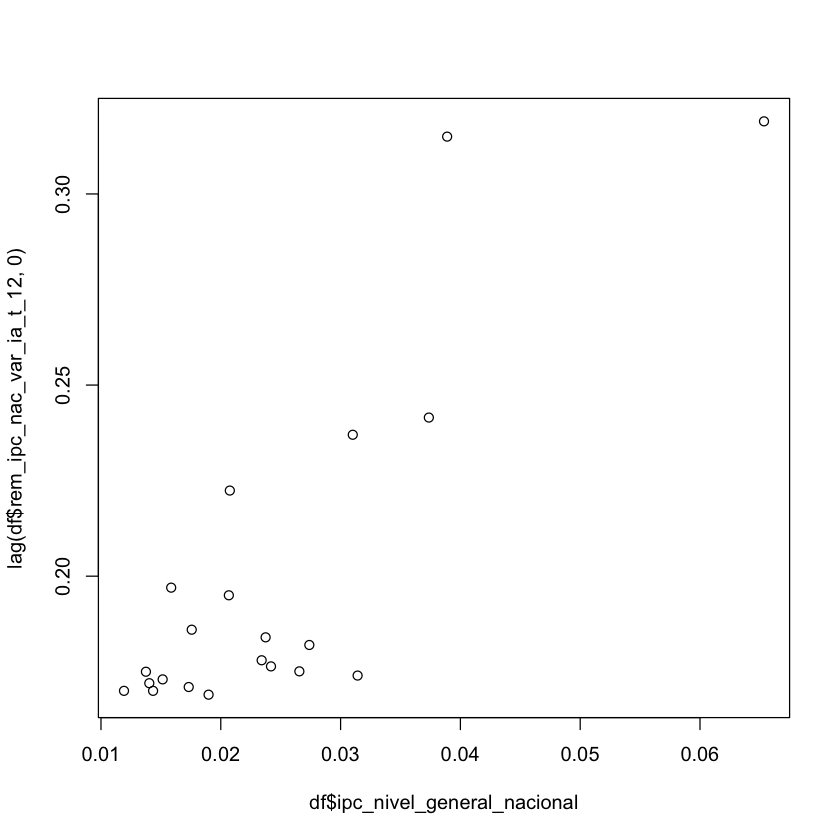

In [314]:
plot(df$ipc_nivel_general_nacional, lag(df$rem_ipc_nac_var_ia_t_12, 0))

b. ¿Tal vez las expectativas de inflación futura inciden con un mes de retraso en la inflación mensual real? Para esto hace falta comparar una regresión entre las dos variables, contra una en la que las expectativas están 1 mes adelantadas. Esto requiere tratar las variables como series de tiempo.
    
    b1. install.packages("dynlm"); install.packages("Hmisc"); library(Hmisc); library("dynlm") (Instala y carga librerías de regresión para series de tiempo)
    b2. library(zoo); df_ts = read.zoo(df, index = 1, tz = "", format = "%Y-%m-%d") (Lee la primer columna como un índice de tiempo con "zoo")
    b3. Regresar la inflación mensual contra las expectativas de inflación futura. Hint: summary(dynlm(df_ts$* ~ df_ts$*))
    b3. Regresar la inflación mensual contra las expectativas de inflación futura desfasadas 1 mes antes. Hint: summary(dynlm(df_ts$* ~ lag(df_ts$*, -1))).
    b4. Comparar los R2 de cada regresión. ¿Mejoró el % de variabilidad de la inflación mensual explicado?

In [315]:
install.packages("dynlm"); install.packages("Hmisc"); library(Hmisc); library("dynlm")

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done
Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [316]:
library(zoo); df_ts = read.zoo(df, index = 1, tz = "", format = "%Y-%m-%d")

In [317]:
summary(dynlm(
    df_ts$ipc_nivel_general_nacional ~ 
    df_ts$rem_ipc_nac_var_ia_t_12
))


Time series regression with "zoo" data:
Start = 2017-01-01, End = 2018-09-01

Call:
dynlm(formula = df_ts$ipc_nivel_general_nacional ~ df_ts$rem_ipc_nac_var_ia_t_12)

Residuals:
      Min        1Q    Median        3Q       Max 
-0.011481 -0.004117 -0.001782  0.003908  0.014066 

Coefficients:
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                   -0.020611   0.007137  -2.888  0.00943 ** 
df_ts$rem_ipc_nac_var_ia_t_12  0.225352   0.035009   6.437 3.59e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.006989 on 19 degrees of freedom
  (0 observations deleted due to missingness)
Multiple R-squared:  0.6856,	Adjusted R-squared:  0.6691 
F-statistic: 41.44 on 1 and 19 DF,  p-value: 3.594e-06


In [318]:
summary(dynlm(
    df_ts$ipc_nivel_general_nacional ~ 
    Lag(df_ts$rem_ipc_nac_var_ia_t_12, 1)
))


Time series regression with "zoo" data:
Start = 2017-02-01, End = 2018-09-01

Call:
dynlm(formula = df_ts$ipc_nivel_general_nacional ~ Lag(df_ts$rem_ipc_nac_var_ia_t_12, 
    1))

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0087399 -0.0039750 -0.0003016  0.0028987  0.0123917 

Coefficients:
                                      Estimate Std. Error t value Pr(>|t|)    
(Intercept)                           -0.03552    0.00638  -5.568 2.76e-05 ***
Lag(df_ts$rem_ipc_nac_var_ia_t_12, 1)  0.31170    0.03249   9.593 1.69e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.005114 on 18 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.8364,	Adjusted R-squared:  0.8273 
F-statistic: 92.03 on 1 and 18 DF,  p-value: 1.685e-08


# LASSO

Sin embargo, la inflación es un fenómeno multicausal. Probablemente el mejor modelo explicativo sea uno que incluya muchas variables... La base de series de tiempo ofrece 20 mil! Si bien no tiene sentido probar con todas, habría que buscar un método que elija el mejor modelo al enfrentarse a muchas variables. (Ver tutorial de LASSO en R para más detalles: https://web.stanford.edu/~hastie/glmnet/glmnet_alpha.html )

a. Cargar en un dataframe de series de tiempo la inflación mensual, la tasa de interés, la variación mensual del tipo de cambio nominal, las expectativas de inflación futura y el tipo de cambio real multilateral, desde 2017. Hint: `df2 = read.csv("https://apis.datos.gob.ar/series/api/series/?limit=1000&ids=*:percent_change,*,*:percent_change,*,*&format=csv&start_date=2017")` 

In [319]:
df2 = read.csv("https://apis.datos.gob.ar/series/api/series/?limit=1000&ids=148.3_INIVELNAL_DICI_M_26:percent_change,89.2_TS_INTE_PM_0_D_16,168.1_T_CAMBIOR_D_0_0_26:percent_change,430.1_MEDIANA_IP_12_M_0_0_27_96,116.3_TCRMA_0_M_36&format=csv&start_date=2017")

In [320]:
colnames(df2)

[1] "indice_tiempo"                       
[2] "ipc_nivel_general_nacional"          
[3] "tasas_interes_pm"                    
[4] "tipo_cambio_bna_vendedor"            
[5] "rem_ipc_nac_var_ia_t_12"             
[6] "tipo_cambio_real_multilateral_actual"

In [321]:
df2

indice_tiempo,ipc_nivel_general_nacional,tasas_interes_pm,tipo_cambio_bna_vendedor,rem_ipc_nac_var_ia_t_12,tipo_cambio_real_multilateral_actual
2017-01-01,0.01585900,24.75000,0.003517234,0.1970,90.65791
2017-02-01,0.02067216,24.75000,-0.020135332,0.1950,88.83677
2017-03-01,0.02374190,24.75000,-0.004182818,0.1840,86.54637
2017-04-01,0.02655830,25.70000,-0.010676656,0.1751,83.57614
2017-05-01,0.01434750,26.25000,0.023613498,0.1700,84.02443
2017-06-01,0.01192073,26.25000,0.023845717,0.1700,84.86319
2017-07-01,0.01732266,26.25000,0.066109731,0.1710,90.87417
2017-08-01,0.01403258,26.25000,0.014622869,0.1720,92.30178
2017-09-01,0.01898045,26.25000,-0.011230780,0.1690,90.44356
2017-10-01,0.01514733,26.58871,0.013274022,0.1730,88.88115


b. Usar el método lasso (librería `glmnet`) para encontrar el mejor modelo posible entre estas variables.

    b1. install.packages("glmnet", repos = "http://cran.us.r-project.org"); library(glmnet)  (Instala y carga glmnet)
    b2. Convertir el dataframe a series de tiempo. Hint: df_ts2 = read.zoo(*, index = 1, tz = "", format = "%Y-%m-%d")
    b3. Remover las filas que tengan algún valor nulo. Hint: * = *[complete.cases(*), ]
    b4. Crear variables con lags de 1 mes para analizar efectos desplazados en el tiempo. Hint: df_ts2$* = Lag(df_ts2$*, 1)
    b5. Crear una matriz de predictores x (sin la variable a predecir). Hint: x = data.matrix(subset(*, select=c("*", "*", "*")))
    b6. Correr lasso usando cross validation. Hint: cvfit = cv.glmnet(x, y)
    b7. Encontrar los coeficientes del modelo que minimiza el error de predicción. Hint: coef(cvfit)

In [322]:
install.packages("glmnet", repos = "http://cran.us.r-project.org"); library(glmnet)

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [323]:
df_ts2 = read.zoo(df2, index = 1, tz = "", format = "%Y-%m-%d")

In [324]:
# genero variables con lags
df_ts2$rem_lag = Lag(df_ts2$rem_ipc_nac_var_ia_t_12, 1)
df_ts2$tc_lag = Lag(df_ts2$tipo_cambio_bna_vendedor, 1)
df_ts2$tcr_lag = Lag(df_ts2$tipo_cambio_real_multilateral_actual, 1)

In [325]:
tail(df_ts2)

           ipc_nivel_general_nacional tasas_interes_pm tipo_cambio_bna_vendedor
2018-05-01                 0.02075375         39.15323               0.16539110
2018-06-01                 0.03736676         40.00000               0.13024673
2018-07-01                 0.03101613         40.00000               0.03498913
2018-08-01                 0.03889439         44.03226               0.08439458
2018-09-01                 0.06534286         60.50000               0.28587768
2018-10-01                         NA         71.83500              -0.03807516
           rem_ipc_nac_var_ia_t_12 tipo_cambio_real_multilateral_actual rem_lag
2018-05-01                  0.2224                             100.6260  0.1820
2018-06-01                  0.2415                             108.4181  0.2224
2018-07-01                  0.2370                             108.5619  0.2415
2018-08-01                  0.3150                             112.3524  0.2370
2018-09-01                  0.3190      

In [326]:
df_ts2 = df_ts2[complete.cases(df_ts2), ]

In [327]:
colnames(df_ts2)

[1] "ipc_nivel_general_nacional"          
[2] "tasas_interes_pm"                    
[3] "tipo_cambio_bna_vendedor"            
[4] "rem_ipc_nac_var_ia_t_12"             
[5] "tipo_cambio_real_multilateral_actual"
[6] "rem_lag"                             
[7] "tc_lag"                              
[8] "tcr_lag"

In [328]:
predictors = subset(df_ts2, select=c("tasas_interes_pm",
                                     "tipo_cambio_bna_vendedor", "rem_ipc_nac_var_ia_t_12", "tipo_cambio_real_multilateral_actual",
                                     "rem_lag", "tc_lag", "tcr_lag"))
x = data.matrix(predictors)
y = df_ts2$ipc_nivel_general_nacional

In [329]:
cvfit = cv.glmnet(x, y)

Warning message:
“Option grouped=FALSE enforced in cv.glmnet, since < 3 observations per fold”

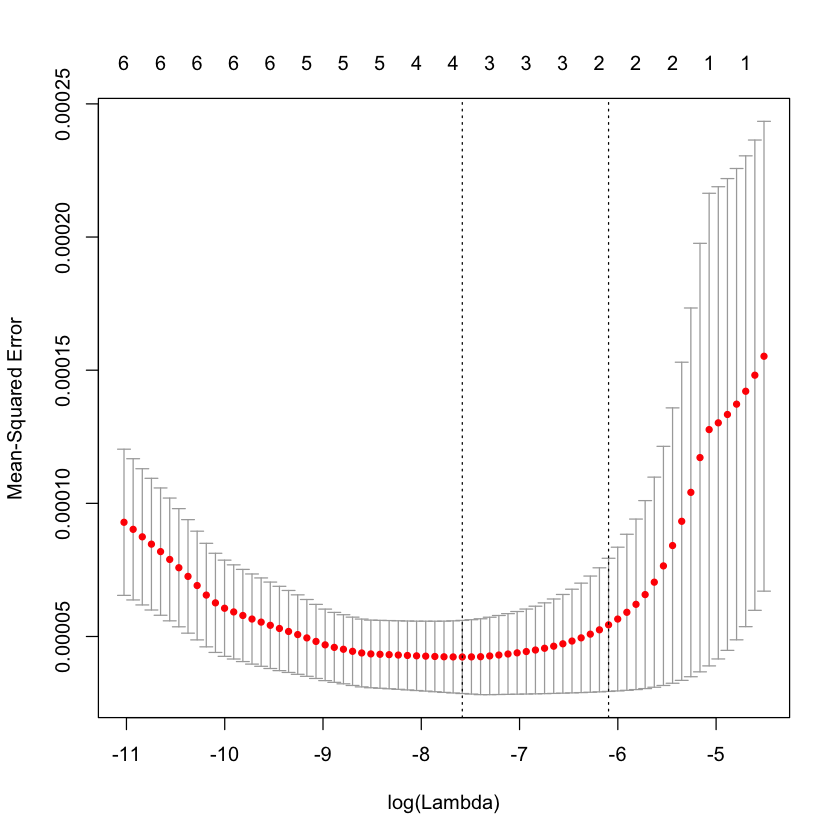

In [330]:
plot(cvfit)

In [331]:
coef(cvfit)

8 x 1 sparse Matrix of class "dgCMatrix"
                                                 1
(Intercept)                          -0.0215176487
tasas_interes_pm                      0.0001228469
tipo_cambio_bna_vendedor              .           
rem_ipc_nac_var_ia_t_12               .           
tipo_cambio_real_multilateral_actual  .           
rem_lag                               0.2193687271
tc_lag                                .           
tcr_lag                               .           

c. Comparar la predicción del modelo con la realidad en un plot. Hint: `y_predict = predict(cvfit, newx = *)` y `plot(y, *)`

In [332]:
y_predict = predict(cvfit, newx = x)

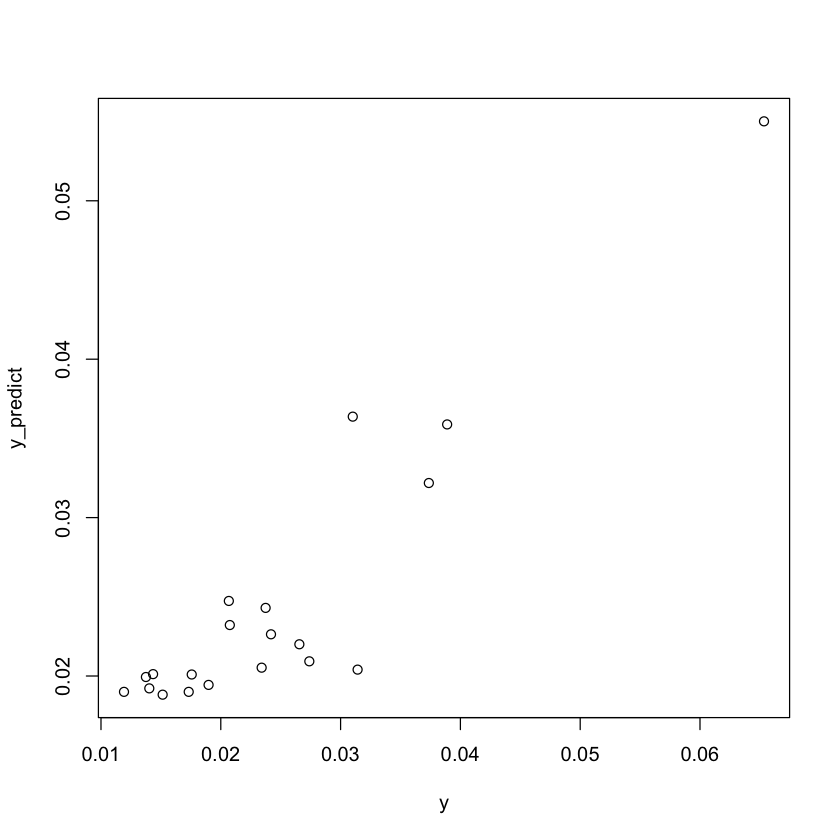

In [333]:
plot(y, y_predict)

d. Calcular la performance del modelo encontrado por lasso para predecir la inflación. Hint: Se puede regresar la inflación observada contra la predicción. `summary(lm(* ~ *))`

In [334]:
summary(lm(y ~ y_predict))


Call:
lm(formula = y ~ y_predict)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0084063 -0.0038384 -0.0003236  0.0026171  0.0121350 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.006444   0.003380  -1.906   0.0727 .  
y_predict    1.260968   0.129077   9.769 1.28e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.005037 on 18 degrees of freedom
Multiple R-squared:  0.8413,	Adjusted R-squared:  0.8325 
F-statistic: 95.44 on 1 and 18 DF,  p-value: 1.278e-08


e. Comparar los coeficientes del modelo encontrado por LASSO con los que surgirían de una regresión lineal común. Hint: `summary(lm(* ~ * + *))`

In [335]:
summary(lm(
    df_ts2$ipc_nivel_general_nacional ~ 
    df_ts2$tasas_interes_pm +
    df_ts2$rem_lag
))


Call:
lm(formula = df_ts2$ipc_nivel_general_nacional ~ df_ts2$tasas_interes_pm + 
    df_ts2$rem_lag)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0081509 -0.0034550 -0.0001998  0.0025192  0.0119546 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)             -0.0321645  0.0077191  -4.167 0.000646 ***
df_ts2$tasas_interes_pm  0.0002545  0.0003220   0.790 0.440202    
df_ts2$rem_lag           0.2532116  0.0809588   3.128 0.006130 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.005168 on 17 degrees of freedom
Multiple R-squared:  0.8422,	Adjusted R-squared:  0.8236 
F-statistic: 45.37 on 2 and 17 DF,  p-value: 1.526e-07


f. El modelo de `gmlnet` devuelve 2 modelos: uno minimiza el error y otro es el más regularizado. Comparar los coeficientes y la performance (R2 de y vs. y predecido) de ambos modelos. Hint para usar el modelo de error mínimo: `coef(*, s = "lambda.min")` y `predict(*, newx = x, s = "lambda.min")`

In [336]:
coef(cvfit, s = "lambda.min")

8 x 1 sparse Matrix of class "dgCMatrix"
                                                 1
(Intercept)                          -3.080853e-02
tasas_interes_pm                      2.035455e-04
tipo_cambio_bna_vendedor              .           
rem_ipc_nac_var_ia_t_12               .           
tipo_cambio_real_multilateral_actual  2.220949e-05
rem_lag                               2.433049e-01
tc_lag                                .           
tcr_lag                               3.538495e-07

In [337]:
y_predict = predict(cvfit, newx = x, s = "lambda.min")

In [338]:
summary(lm(y ~ y_predict))


Call:
lm(formula = y ~ y_predict)

Residuals:
       Min         1Q     Median         3Q        Max 
-0.0082020 -0.0035688 -0.0002083  0.0025270  0.0120929 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.001207   0.002871  -0.421    0.679    
y_predict    1.048901   0.106993   9.803 1.21e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.005022 on 18 degrees of freedom
Multiple R-squared:  0.8423,	Adjusted R-squared:  0.8335 
F-statistic: 96.11 on 1 and 18 DF,  p-value: 1.211e-08
